In [3]:
import sys
sys.path.append('../data/')
sys.path.append('../src/')

import networkx as nx
import numpy as np

import MNIST_DATA

<h1>Handwritten Digits</h1>

First, load the handwritten digits data using the MNIST module:

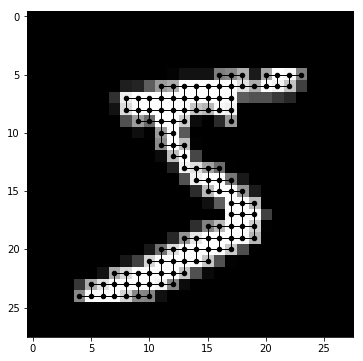

In [2]:
mnistData = MNIST_DATA.MNIST_DATA()
mnistData.plot_digit(0)

The MNIST_DATA class contains a function which converts the grayscale digit into simple graph, as shown in the graphic above.

<h2>Spectral Distance</h2>

To calculate the spectral distance between two graphs, first identify the eigenvalues $\lambda_i^{(1)}$ and $\lambda_i^{(2)}$ of the two graph Laplacian matrices. Sort the eigenvalues in ascending order, and pad the shortest vector with zeros so that they have the same length. Then take the distance
\begin{equation}
d(G_1, G_2) = \sum_{i = 1}^n \left| \lambda_i^{(1)} - \lambda_i^{(2)} \right|
\end{equation}

In [6]:
def spectrum(idx):
    '''
    Returns the Laplacian spectrum for a graph with adjacency matrix A.
    Eigenvalues are returned in ascending order.
    '''
    A, _, _ = mnistData.get_digit_graph(idx)
    G = nx.from_numpy_matrix(A)
    return -np.sort(-nx.laplacian_spectrum(G))

Calculate the spectra of all of the digit graphs:

In [12]:
spectra = [[] for digit in range(10)]
for i in range(6000):
    digit = mnistData.train_labels[i]
    spectra[digit].append(spectrum(i))

Find the spectra with most eigenvalues, and pad the remaining spectra with zeros:

In [13]:
L = max([max([len(s) for s in spectra[d]]) for d in range(10)])


280